# Data Analysis Process
In this notebook, we are working on analyzing the enriched versions of Book-Crossing that we created in A. Data Enrichment Process.



## 0. Import Libraries
First, we are importing libraries that are needed for our process.

In [1]:
import time
import pandas as pd
import numpy as np
import pickle as pkl
from collections import Counter
import re
import math
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pywaffle import Waffle
from scipy.signal import find_peaks

We are setting the locations where we are saving our output files. The "large" location is used for files too large to be added on github - hence they are ignored during the git commit.

In [2]:
location_to_save = "data/final_files/"
large_location_to_save = "data/final_files/large_files/"

## 1. Analyze datasets

A. Read files.

In [3]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")

In [4]:
dfs = [entire_books, entire_ratings, fairbook_books, fairbook_ratings]

In [5]:
dfs_names = ['entire books', 'entire ratings', 'fairbook books', 'fairbook ratings']

## Analyze gender

In [8]:
i = 0 
for df in dfs:
    print(dfs_names[i])
    df["gender"] = df["gender"].apply(lambda x: "unknown" if x=="" else x)
    df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"
    i += 1

entire books
entire ratings


/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


fairbook books
fairbook ratings
entire_filtered_ISBN
fairbook_filtered_ISBN


In [9]:
colors={'male':'#1f77b4', 
        'other':'#d62728',
       "female":"#ff7f0e",
       "unknown":"#2ca02c"}

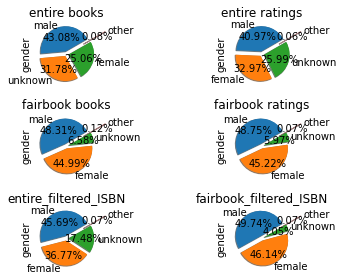

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)
for i in range(len(dfs)):
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    dfs[i].gender.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.1,0.8), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)],
                                     colors=[colors[v] for v in df['gender'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

In [11]:
def check_most_common(column):
    most_common_5=[]
    for df in dfs:
        most_common_5.append(set([x[0] for x in Counter(df[column]).most_common()[:5]]))
    return len(np.unique(most_common_5))==1

## Analyze country

In [34]:
check_most_common("country")

False

In [35]:
for df in dfs:
    df["country"] = df["country"].apply(lambda x: "unknown" if x=="" else x)

In [36]:
most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

In [37]:
for df in dfs:
    df["country"][df.country.isin(most_common_5) == False] = "other"

/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [38]:
colors={'USA':'#1f77b4', 
        'UK':'#d62728',
       "Ireland":"#8c564b",
       "unknown":"#ff7f0e",
       "Canada":"#9467bd",
       "other":"#2ca02c"}

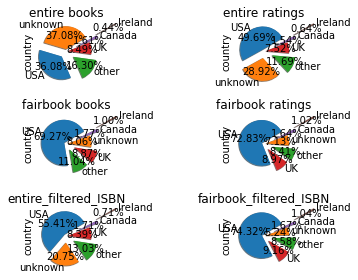

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2)
for i in range(len(dfs)):
    df = dfs[i].copy()
    df.country = df.country.replace("United States of America", "USA")
    df.country = df.country.replace("United Kingdom", "UK")
    df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)], 
                                   colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

## Analyze Language

In [41]:
for df in dfs:
    df["language"] = df["language"].apply(lambda x: "unknown" if x=="" else x)
    #df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"

In [42]:
check_most_common("language")

False

In [43]:
most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

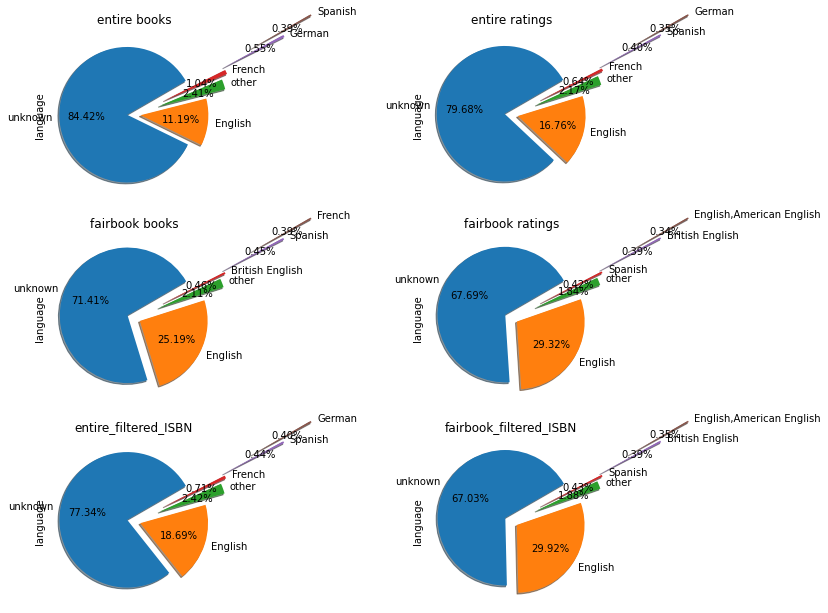

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    most_common_5 = [x[0] for x in Counter(df.language).most_common()[:5]]
    df["language"][df.language.isin(most_common_5) == False] = "other"
    
    #df.country = df.country.replace("United States of America", "USA")
    #df.country = df.country.replace("United Kingdom", "UK")
    #df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.language.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.4,0.5, 1.5,2), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)])
    #, 
     #                              colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

## Analyze birthyear

/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/export/scratch2/home/savvina/new_environment/lib64/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

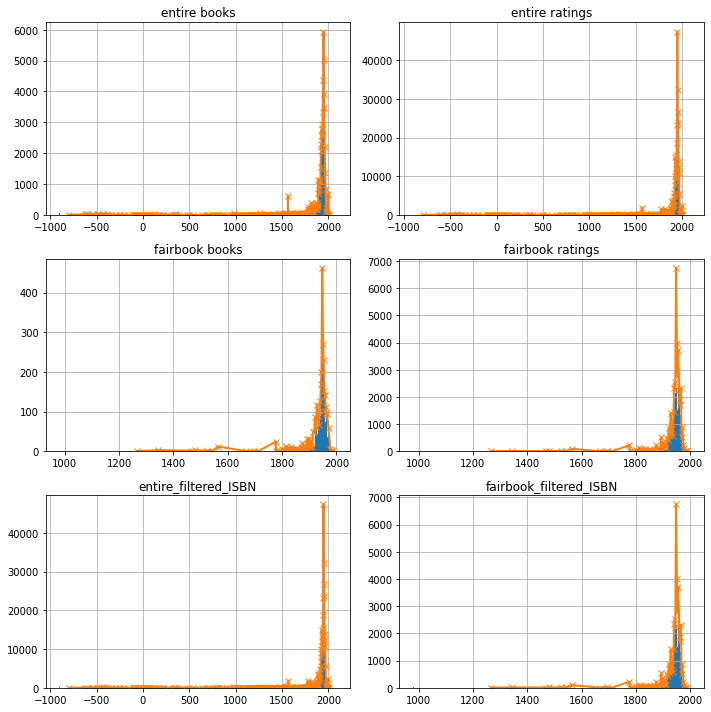

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    df = dfs[i].copy()
    c = df[df.birthyear!=""]
    c.birthyear = c.birthyear.astype("float")
    max_frequency = c['birthyear'].value_counts().max()
    #print(max_frequency)
#     print(c.birthyear.mode().iloc[0])
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    
    n = math.ceil((c.birthyear.max() - c.birthyear.min()))
#     print(n)
    c.hist(column="birthyear", bins=n,ax=axes[int(j1),int(j2)])
#     df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
#                                       , startangle=30, ax=axes[int(j1),int(j2)], 
#                                    colors=[colors[v] for v in df['country'].value_counts().keys()])

    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
    
    hist, bin_edges = np.histogram(list(c.birthyear), int(max(c.birthyear)-min(c.birthyear)))
    bin_edges = bin_edges[1:]
    peaks, _ = find_peaks(hist)
    axes[int(j1),int(j2)].plot(bin_edges[peaks], hist[peaks],linewidth=2, marker ='x')
    
    #axes[int(j1),int(j2)].set_ylim(0,max_frequency)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.9, 
#                     hspace=0.2)    
fig.tight_layout()
fig.show()

In [46]:
for df in dfs:
    df["birthyear_coded"] = df["birthyear"].apply(lambda x: "1000000" if x=="" else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "2000000" if int(x)<0 else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "3000000" if (int(x)>=0)&(int(x)<1900) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "4000000" if (int(x)>=1900)&(int(x)<1950) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "5000000" if (int(x)>=1950)&(int(x)<200000) else x)

In [47]:
for df in dfs:
    df.birthyear_coded = df.birthyear_coded.replace("1000000","unknown")
    df.birthyear_coded = df.birthyear_coded.replace("2000000","B.C.")
    df.birthyear_coded = df.birthyear_coded.replace("3000000","0-1900")
    df.birthyear_coded = df.birthyear_coded.replace("4000000","1900-1950")
    df.birthyear_coded = df.birthyear_coded.replace("5000000","1950-2000")

In [48]:
colors={'1900-1950':'#1f77b4', 
        '1950-2000':'#d62728',
       "unknown":"#2ca02c",
       "0-1900":"#ff7f0e",
       "B.C.":"black"}

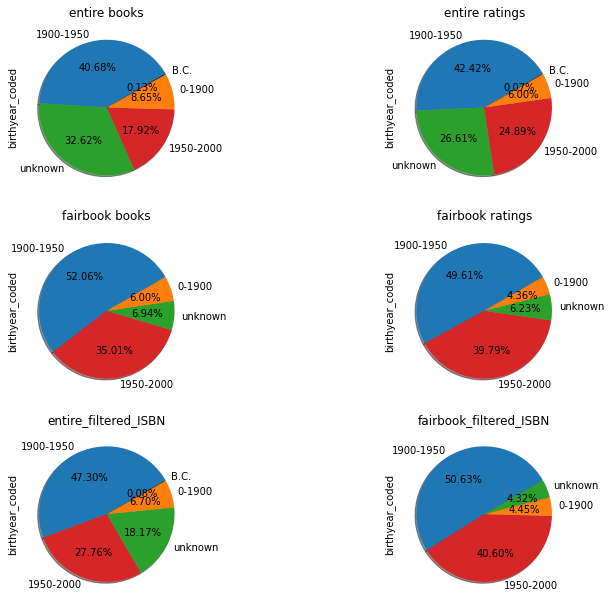

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     ,colors=[colors[v] for v in df['birthyear_coded'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

In [50]:
for df in dfs:
    for index, row in df.iterrows():
        if (row.birthyear_coded == "1950-2000") | (row.birthyear_coded == "1900-1950"):
            year = row.birthyear
            year_rounded_down = math.floor(year/10)*10
            df.at[index, "birthyear_coded"] = str(year_rounded_down)+"s"

In [51]:
dfs[0].birthyear_coded.unique()

array(['unknown', '1930s', '1940s', '1950s', '1960s', '1970s', '0-1900',
       '1920s', '1900s', '1910s', '2000s', '1980s', '1990s', 'B.C.',
       '2080s'], dtype=object)

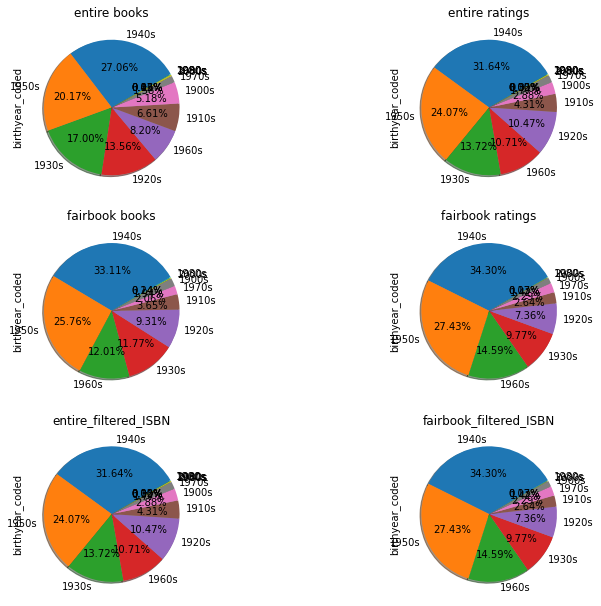

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    df = df[(df.birthyear_coded!="unknown")&(df.birthyear_coded!="B.C.")&(df.birthyear_coded!="0-1900")]
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     )
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

In [53]:
dfs[0][dfs[0].birthyear_coded == "2000s"].birthyear.unique()

array([2000.0, 2002.0], dtype=object)

In [ ]:
# 15. Analyze datasets.

A. Read files.

entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties.csv", low_memory=False, index_col=0).fillna("")

entire_ratings_filtered_ISBN = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings_filtered_ISBN = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_ISBNs.csv", low_memory=False, index_col=0).fillna("")

dfs = [entire_books, entire_ratings, fairbook_books, fairbook_ratings, entire_ratings_filtered_ISBN, fairbook_ratings_filtered_ISBN]

dfs_names = ['entire books', 'entire ratings', 'fairbook books', 'fairbook ratings', "entire_filtered_ISBN", "fairbook_filtered_ISBN"]

## Analyze gender

i = 0 
for df in dfs:
    print(dfs_names[i])
    df["gender"] = df["gender"].apply(lambda x: "unknown" if x=="" else x)
    df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"
    i += 1

colors={'male':'#1f77b4', 
        'other':'#d62728',
       "female":"#ff7f0e",
       "unknown":"#2ca02c"}

fig, axes = plt.subplots(nrows=3, ncols=2)
for i in range(len(dfs)):
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    dfs[i].gender.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.1,0.8), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)],
                                     colors=[colors[v] for v in df['gender'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

def check_most_common(column):
    most_common_5=[]
    for df in dfs:
        most_common_5.append(set([x[0] for x in Counter(df[column]).most_common()[:5]]))
    return len(np.unique(most_common_5))==1

## Analyze country

check_most_common("country")

for df in dfs:
    df["country"] = df["country"].apply(lambda x: "unknown" if x=="" else x)

most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

for df in dfs:
    df["country"][df.country.isin(most_common_5) == False] = "other"

colors={'USA':'#1f77b4', 
        'UK':'#d62728',
       "Ireland":"#8c564b",
       "unknown":"#ff7f0e",
       "Canada":"#9467bd",
       "other":"#2ca02c"}

fig, axes = plt.subplots(nrows=3, ncols=2)
for i in range(len(dfs)):
    df = dfs[i].copy()
    df.country = df.country.replace("United States of America", "USA")
    df.country = df.country.replace("United Kingdom", "UK")
    df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)], 
                                   colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

## Analyze Language

for df in dfs:
    df["language"] = df["language"].apply(lambda x: "unknown" if x=="" else x)
    #df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"

check_most_common("language")

most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    most_common_5 = [x[0] for x in Counter(df.language).most_common()[:5]]
    df["language"][df.language.isin(most_common_5) == False] = "other"
    
    #df.country = df.country.replace("United States of America", "USA")
    #df.country = df.country.replace("United Kingdom", "UK")
    #df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.language.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.4,0.5, 1.5,2), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)])
    #, 
     #                              colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

## Analyze birthyear

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    df = dfs[i].copy()
    c = df[df.birthyear!=""]
    c.birthyear = c.birthyear.astype("float")
    max_frequency = c['birthyear'].value_counts().max()
    #print(max_frequency)
#     print(c.birthyear.mode().iloc[0])
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    
    n = math.ceil((c.birthyear.max() - c.birthyear.min()))
#     print(n)
    c.hist(column="birthyear", bins=n,ax=axes[int(j1),int(j2)])
#     df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
#                                       , startangle=30, ax=axes[int(j1),int(j2)], 
#                                    colors=[colors[v] for v in df['country'].value_counts().keys()])

    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
    
    hist, bin_edges = np.histogram(list(c.birthyear), int(max(c.birthyear)-min(c.birthyear)))
    bin_edges = bin_edges[1:]
    peaks, _ = find_peaks(hist)
    axes[int(j1),int(j2)].plot(bin_edges[peaks], hist[peaks],linewidth=2, marker ='x')
    
    #axes[int(j1),int(j2)].set_ylim(0,max_frequency)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.9, 
#                     hspace=0.2)    
fig.tight_layout()
fig.show()

for df in dfs:
    df["birthyear_coded"] = df["birthyear"].apply(lambda x: "1000000" if x=="" else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "2000000" if int(x)<0 else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "3000000" if (int(x)>=0)&(int(x)<1900) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "4000000" if (int(x)>=1900)&(int(x)<1950) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "5000000" if (int(x)>=1950)&(int(x)<200000) else x)

for df in dfs:
    df.birthyear_coded = df.birthyear_coded.replace("1000000","unknown")
    df.birthyear_coded = df.birthyear_coded.replace("2000000","B.C.")
    df.birthyear_coded = df.birthyear_coded.replace("3000000","0-1900")
    df.birthyear_coded = df.birthyear_coded.replace("4000000","1900-1950")
    df.birthyear_coded = df.birthyear_coded.replace("5000000","1950-2000")

colors={'1900-1950':'#1f77b4', 
        '1950-2000':'#d62728',
       "unknown":"#2ca02c",
       "0-1900":"#ff7f0e",
       "B.C.":"black"}

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     ,colors=[colors[v] for v in df['birthyear_coded'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

for df in dfs:
    for index, row in df.iterrows():
        if (row.birthyear_coded == "1950-2000") | (row.birthyear_coded == "1900-1950"):
            year = row.birthyear
            year_rounded_down = math.floor(year/10)*10
            df.at[index, "birthyear_coded"] = str(year_rounded_down)+"s"

dfs[0].birthyear_coded.unique()

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    df = df[(df.birthyear_coded!="unknown")&(df.birthyear_coded!="B.C.")&(df.birthyear_coded!="0-1900")]
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     )
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

dfs[0][dfs[0].birthyear_coded == "2000s"].birthyear.unique()

# Graphs

# Finally make graphs.

### Set colormaps

In [21]:
color1=mcp.gen_color(cmap="Pastel2",n=8)
print(color1)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']


In [22]:
most_common_8 = [x[0] for x in Counter(entire_ratings_country.country).most_common()[:8]]

In [23]:
most_common_8.append('other')

In [24]:
colors = {}

In [25]:
most_common_8.remove("Germany")

In [26]:
i = 0
for country in most_common_8:
    colors[country] = color1[i]
    i+=1

In [27]:
colors

{'United States of America': '#b3e2cd',
 'unknown': '#fdcdac',
 'United Kingdom': '#cbd5e8',
 'Canada': '#f4cae4',
 'France': '#e6f5c9',
 'United Kingdom,United Kingdom of Great Britain and Ireland': '#fff2ae',
 'Republic of Ireland': '#f1e2cc',
 'other': '#cccccc'}

### Read data

Here are the files I will be using!

In [28]:
entire_books = pd.read_csv(location_to_save+"items_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv(large_location_to_save+"entire_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv(location_to_save+"fairbook_ratings_with_readable_properties_filtered_correct_ISBNs.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv(location_to_save+"fairbook_books_with_readable_properties_correct_ISBN.csv", low_memory=False, index_col=0).fillna("")

Just a small final test

In [30]:
fairbook_ratings.head(1)

,User-ID,ISBN,Book-Rating,title,author,year,publisher,alt_title,alt_author,correct_author,...,QID,sexuality,country,language,religion,gender,ethnicity,birthyear,deathyear,label
1,276847,3551551677,10,Harry Potter und der Stein der Weisen,Joanne K. Rowling,1999.0,Carlsen Verlag GmbH,Harry Potter und der Stein der Weisen,Joanne K. Rowling,Joanne K. Rowling,...,Q34660,,United Kingdom,English,Anglicanism,female,English people,1965,,J. K. Rowling


The above makes sense because not all the books are in the ratings!

## Entire ratings

In [31]:
entire_ratings_country = pd.DataFrame(entire_ratings["country"])
entire_ratings_country["country"] = entire_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

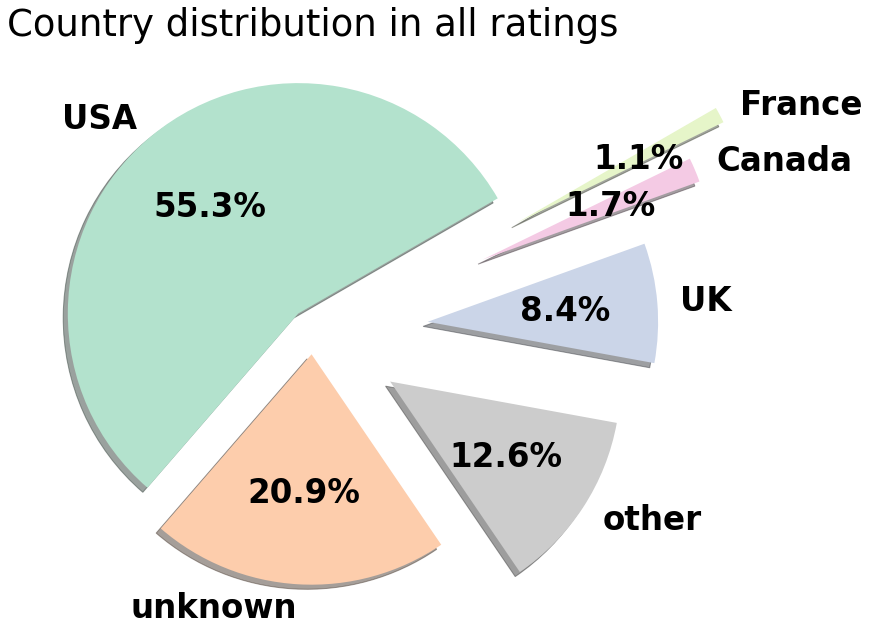

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              ,colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in all ratings", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [33]:
df.country.value_counts()/len(df)*100

USA        55.311412
unknown    20.869367
other      12.612847
UK          8.374444
Canada      1.716108
France      1.115823
Name: country, dtype: float64

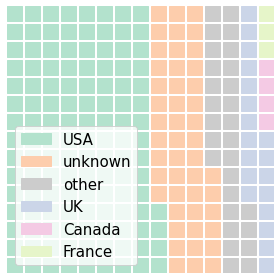

In [34]:
calculated = df.country.value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=15,
    values=list(calculated.values),
    labels=list(calculated.index),
    legend={
        'loc': 'lower left',
        'fontsize': 15
    },
    colors=[colors[key] for key in most_common_6],
)

plt.show()

In [116]:
pie

<AxesSubplot:ylabel='country'>

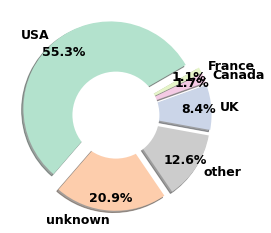

In [126]:
#fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), shadow=True
                                      , startangle=30,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':12.5}
                              ,colors=[colors[key] for key in most_common_6], pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.5, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.show()

# Entire books

In [26]:
entire_books_country = pd.DataFrame(entire_books.drop_duplicates("ISBN")["country"])
entire_books_country["country"] = entire_books_country["country"].apply(lambda x: "unknown" if x=="" else x)

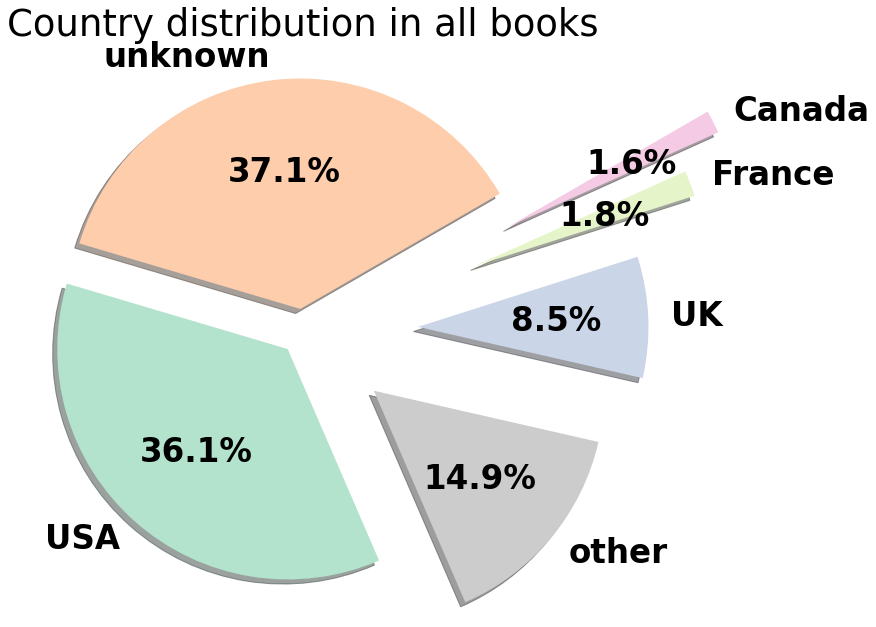

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = entire_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              ,colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in all books", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [28]:
df.country.value_counts()/len(df)*100

unknown    37.080631
USA        36.079378
other      14.937721
UK          8.490198
France      1.803140
Canada      1.608933
Name: country, dtype: float64

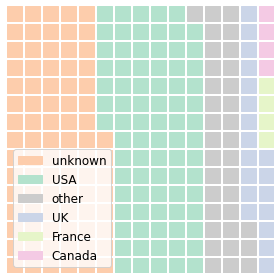

In [29]:
calculated = df.country.value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=15,
    values=list(calculated.values),
    labels=list(calculated.index),
    legend={
        'loc': 'lower left',
        'fontsize': 12
    },
    colors=[colors[key] for key in most_common_6]
)

plt.show()

## Fairbook ratings

In [30]:
fairbook_ratings_country = pd.DataFrame(fairbook_ratings["country"])
fairbook_ratings_country["country"] = fairbook_ratings_country["country"].apply(lambda x: "unknown" if x=="" else x)

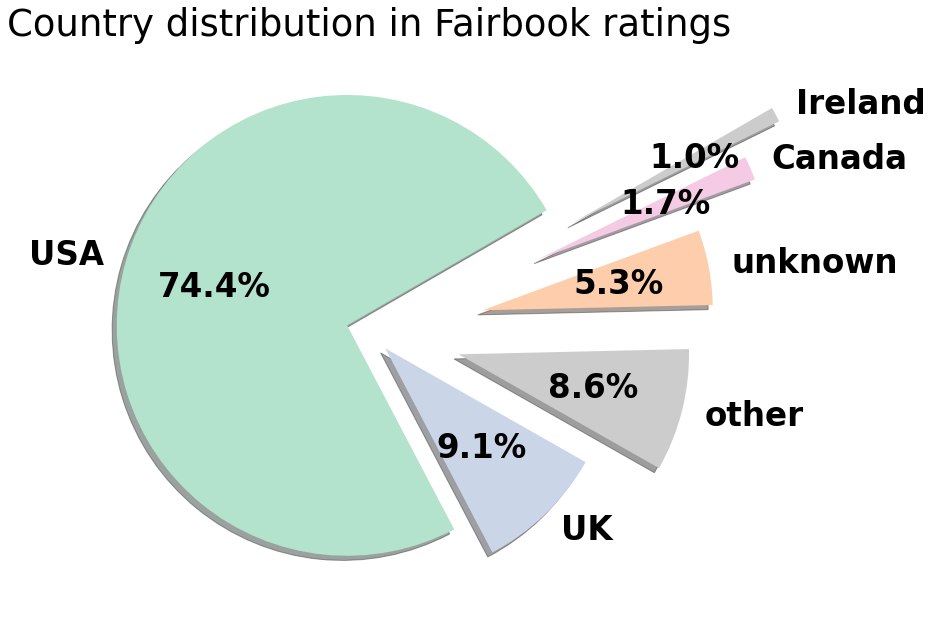

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_ratings_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in Fairbook ratings", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [32]:
df.country.value_counts()/len(df)*100

USA        74.359628
UK          9.086803
other       8.583075
unknown     5.253833
Canada      1.673306
Ireland     1.043355
Name: country, dtype: float64

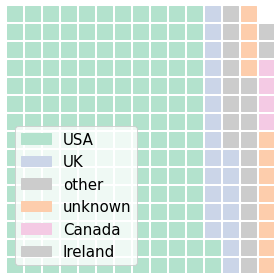

In [34]:
calculated = df.country.value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=15,
    values=list(calculated.values),
    labels=list(calculated.index),
    legend={
        'loc': 'lower left',
        'fontsize': 15
    },
    colors=[colors[key] for key in most_common_6]
)

plt.show()

# Fairbook books

In [92]:
fairbook_books_country = pd.DataFrame(fairbook_books.drop_duplicates("ISBN_alt")["country"])
fairbook_books_country["country"] = fairbook_books_country["country"].apply(lambda x: "unknown" if x=="" else x)

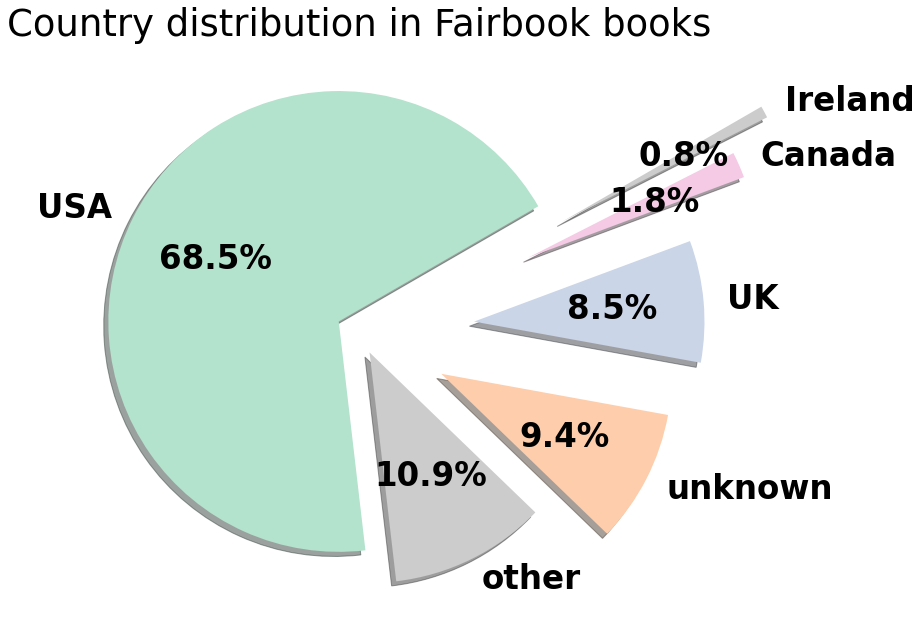

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
df = fairbook_books_country.copy()
most_common_5 = [x[0] for x in Counter(df.country).most_common()[:5]]
df["country"][df.country.isin(most_common_5) == False] = "other"
most_common_6 = [x[0] for x in Counter(df.country).most_common()[:6]]
df.country = df.country.replace("United States of America", "USA")
df.country = df.country.replace("United Kingdom", "UK")
df.country = df.country.replace("Republic of Ireland", "Ireland")
df.country.value_counts().plot(kind="pie",explode=(0.1, 0.1, 0.4,0.5, 0.8,1), shadow=True
                                      , startangle=30, ax=ax,  autopct='%1.1f%%',
                              textprops={'color':'black', 'weight':'bold', 'fontsize':32.5}
                              , colors=[colors[key] for key in most_common_6])
ax.tick_params(labelrotation=0)
ax.set_title("Country distribution in Fairbook books", fontdict={'fontsize': 37})
#plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

In [94]:
df.country.value_counts()/len(df)*100

USA        68.513808
other      10.937500
unknown     9.356831
UK          8.539244
Canada      1.816860
Ireland     0.835756
Name: country, dtype: float64

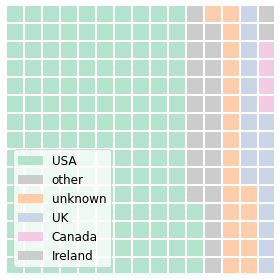

In [95]:
calculated = df.country.value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=15,
    values=list(calculated.values),
    labels=list(calculated.index),
    legend={
        'loc': 'lower left',
        'fontsize': 12
    },
    colors=[colors[key] for key in most_common_6]
)

plt.show()